In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree


In [2]:
data = fetch_california_housing()

In [23]:
df= pd.DataFrame(data.data, columns=data.feature_names)
df['target']= data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [28]:
# Seperate Independent and dependent data
X = df.iloc[:, :-1]
y = df.target


In [29]:
# Train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
regression = DecisionTreeRegressor()
parameter = {
  'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8],
  'max_features':[ 'sqrt', 'log2']
}

In [6]:
model = GridSearchCV(regression, param_grid=parameter, cv=5, scoring= 'neg_mean_squared_error')

In [7]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [31]:
model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [32]:
regression1 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features='log2',splitter='best')

In [33]:
regression1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='log2')

In [34]:
y_pred = regression1.predict(X_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test, y_pred)

0.6713362842743772

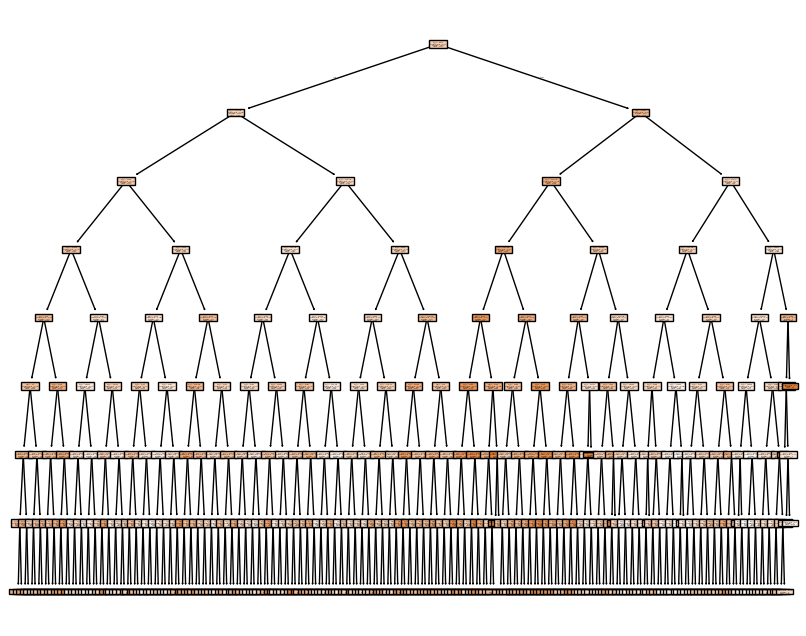

In [43]:
plt.figure(figsize=(10,8))
tree.plot_tree(regression1, filled=True)
plt.show()